<a href="https://colab.research.google.com/github/dianaaldiarbek/COVID--19DetectionProject/blob/data/CVProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dianaaldiarbek","key":"29ce709a921f7569183bd762f40181f6"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2847        242  1.0              
thedevastator/global-video-game-sales-and-reviews      Global Video Game Sales and Reviews          56KB  2023-12-20 06:36:51            987         27  1.0              
bhavikjikadara/car-price-prediction-dataset            Car Price Prediction Dataset                  4KB  2023-12-23 07:07:54           1046         31  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          12324     

In [ ]:
!kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection

 98% 173M/176M [00:02<00:00, 69.8MB/s]
100% 176M/176M [00:02<00:00, 62.9MB/s]


In [ ]:
!unzip chest-xray-for-covid19-detection.zip

Archive:  chest-xray-for-covid19-detection.zip
  inflating: Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr3

In [ ]:
import cv2
import os


folder_path = R'/content/Dataset'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg')  or filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)

        # Read the JPEG image
        image = cv2.imread(image_path)

        # Check if the image is successfully loaded
        if image is not None:
            # Display the image
            cv2.imshow('JPEG Image', image)

            # Wait for a key press and then close the window
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Error: Unable to read the image at {image_path}")

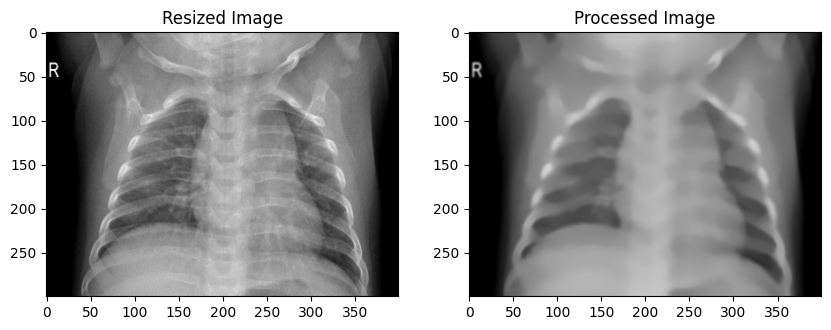

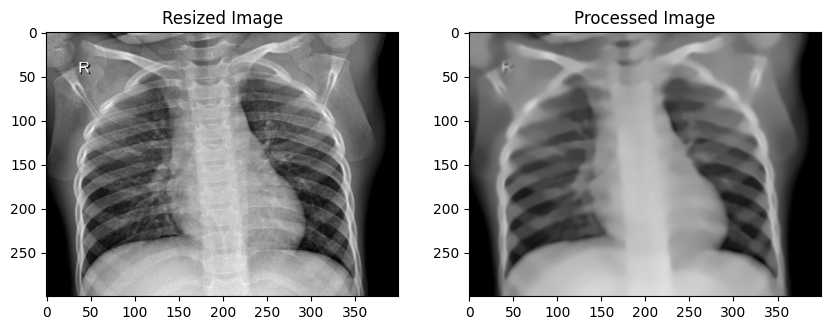

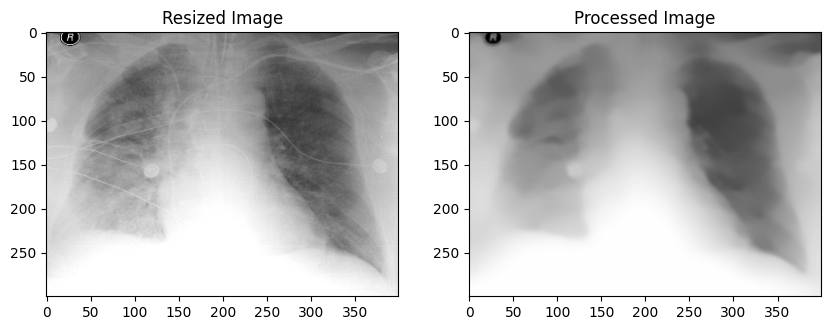

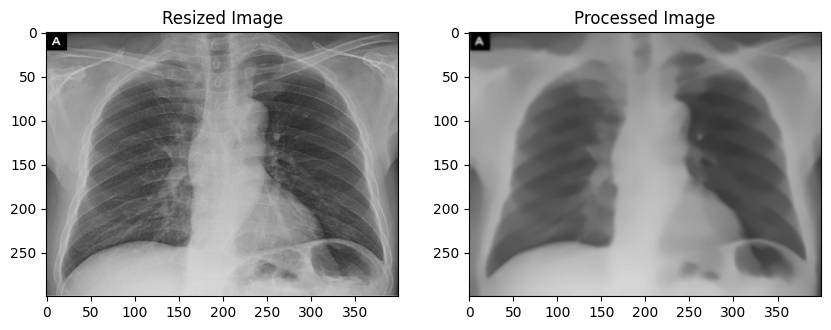

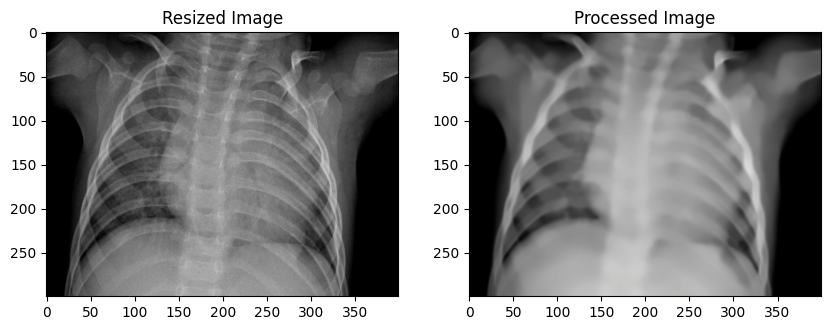

Все изображения в папке /content/Dataset/Prediction обработаны.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Задайте путь к вашему каталогу с изображениями
input_directory = r'/content/Dataset/Prediction'
output_directory = r'/content/Dataset/Processed_Prediction'

# Убедитесь, что каталог для сохранения обработанных изображений существует
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Получите список файлов в каталоге
image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpeg') or f.endswith('.jpg') or f.endswith('.png')]

# Проходите по каждому файлу изображения
for index, image_file in enumerate(image_files):
    # Загрузите изображение
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is not None:
        # Resize the image
        new_width = 400
        new_height = 300
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # Min-Max Scaling для нормализации изображения
        min_val, max_val = np.min(resized_image), np.max(resized_image)
        normalized_image = (resized_image - min_val) / (max_val - min_val)

        # Преобразуйте нормализованное изображение в тип данных CV_8UC3
        normalized_image = (normalized_image * 255).astype(np.uint8)

        # 1.1 Размытие по Гауссу для шумоподавления
        blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

        # 1.2 Шумоподавление с помощью фильтра Non-Local Means
        denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

        # 1.3 Удаление артефактов: Обнаружение и удаление контуров
        contours, _ = cv2.findContours(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:  # Удалить маленькие контуры (можно настроить)
                cv2.drawContours(denoised_image, [contour], 0, (255, 255, 255), -1)


        # Создайте новое имя файла для обработанного изображения
        processed_image_filename = 'processed_' + image_file

        # Сохраните обработанное изображение в новом каталоге
        processed_image_path = os.path.join(output_directory, processed_image_filename)
        cv2.imwrite(processed_image_path, denoised_image)

        # Отобразите исходное и обработанное изображение только для первых 5 изображений
        if index < 5:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title('Resized Image')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title('Processed Image')

            plt.show()

# Выведите сообщение после обработки всех изображений
print(f"Все изображения в папке {input_directory} обработаны.")


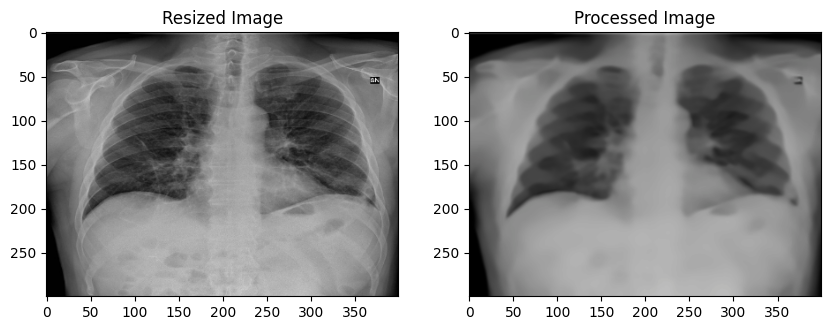

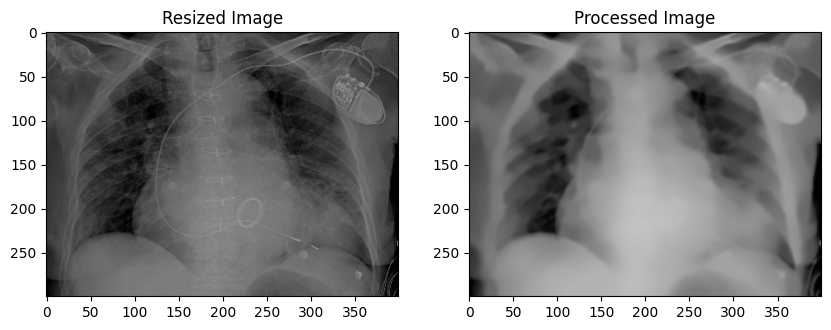

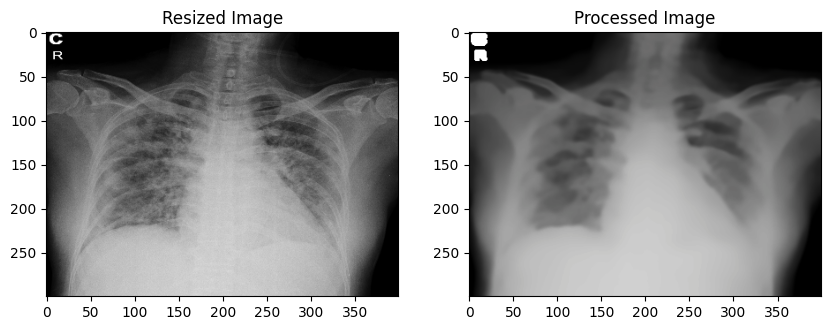

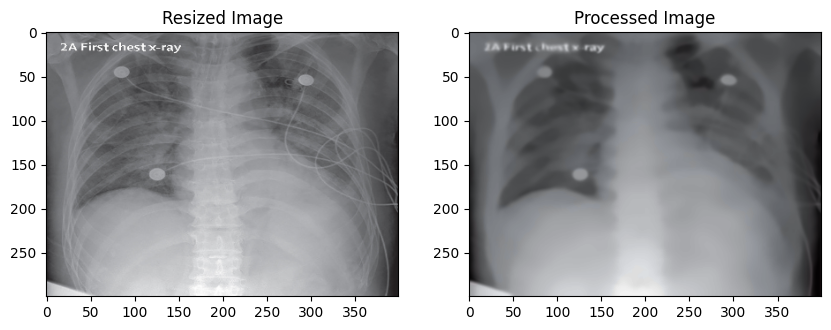

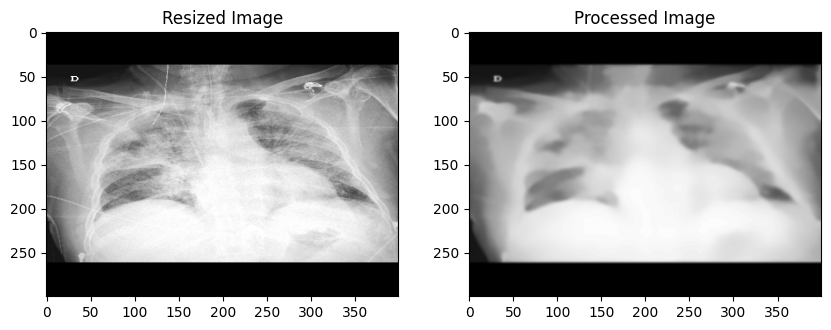

Все изображения в папке /content/Dataset/Train/Covid обработаны.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Задайте путь к вашему каталогу с изображениями
input_directory = r'/content/Dataset/Train/Covid'
output_directory = r'/content/Dataset/Train/Processed_Covid'

# Убедитесь, что каталог для сохранения обработанных изображений существует
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Получите список файлов в каталоге
image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpeg') or f.endswith('.jpg') or f.endswith('.png')]

# Проходите по каждому файлу изображения
for index, image_file in enumerate(image_files):
    # Загрузите изображение
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is not None:
        # Resize the image
        new_width = 400
        new_height = 300
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # Min-Max Scaling для нормализации изображения
        min_val, max_val = np.min(resized_image), np.max(resized_image)
        normalized_image = (resized_image - min_val) / (max_val - min_val)

        # Преобразуйте нормализованное изображение в тип данных CV_8UC3
        normalized_image = (normalized_image * 255).astype(np.uint8)

        # 1.1 Размытие по Гауссу для шумоподавления
        blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

        # 1.2 Шумоподавление с помощью фильтра Non-Local Means
        denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

        # 1.3 Удаление артефактов: Обнаружение и удаление контуров
        contours, _ = cv2.findContours(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:  # Удалить маленькие контуры (можно настроить)
                cv2.drawContours(denoised_image, [contour], 0, (255, 255, 255), -1)


        # Создайте новое имя файла для обработанного изображения
        processed_image_filename = 'processed_' + image_file

        # Сохраните обработанное изображение в новом каталоге
        processed_image_path = os.path.join(output_directory, processed_image_filename)
        cv2.imwrite(processed_image_path, denoised_image)

        # Отобразите исходное и обработанное изображение только для первых 5 изображений
        if index < 5:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title('Resized Image')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title('Processed Image')

            plt.show()

# Выведите сообщение после обработки всех изображений
print(f"Все изображения в папке {input_directory} обработаны.")


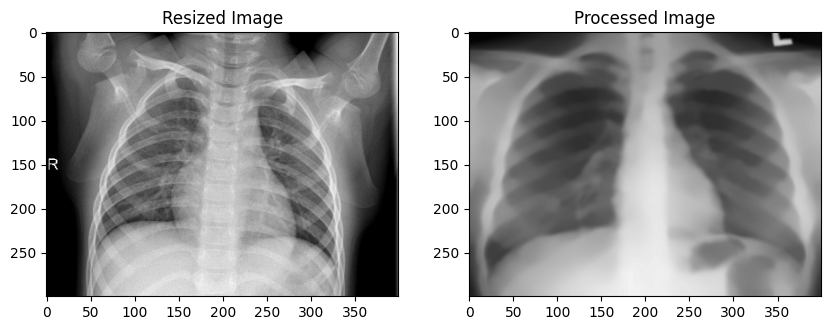

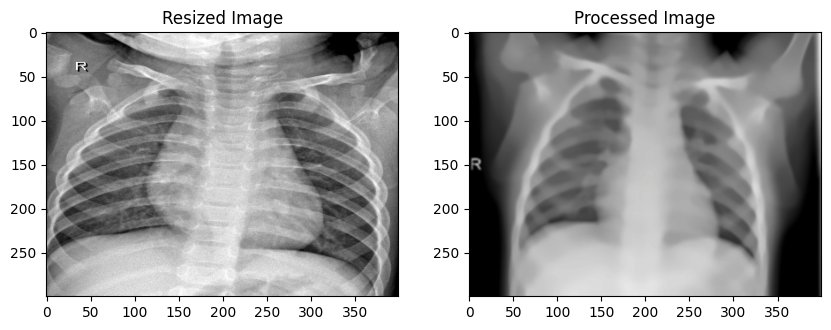

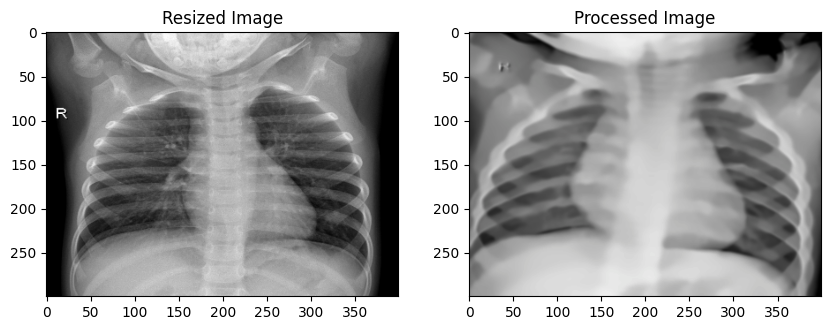

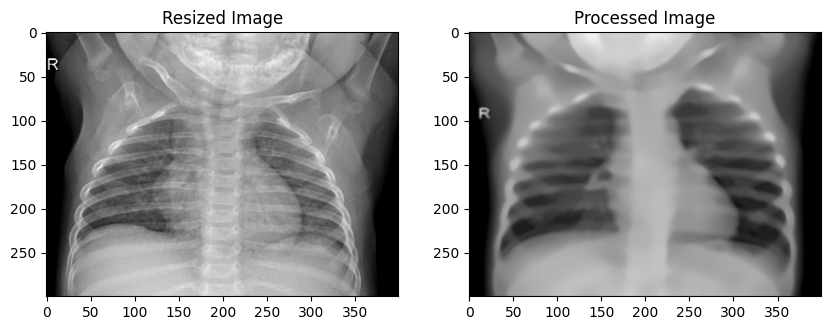

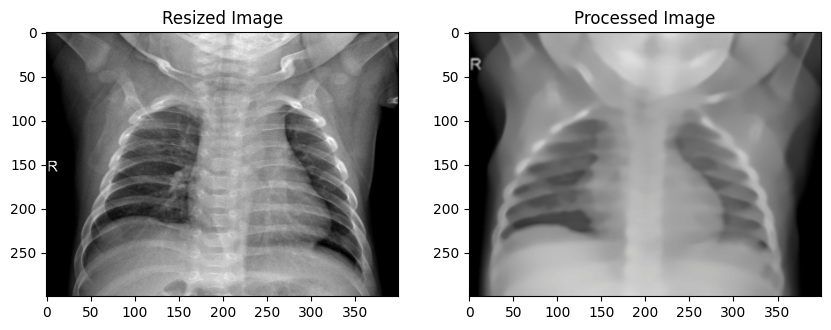

Все изображения в папке /content/Dataset/Train/Normal обработаны.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Задайте путь к вашему каталогу с изображениями
input_directory = r'/content/Dataset/Train/Normal'
output_directory = r'/content/Dataset/Train/Processed_Normal'

# Убедитесь, что каталог для сохранения обработанных изображений существует
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Получите список файлов в каталоге
image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpeg') or f.endswith('.jpg') or f.endswith('.png')]

# Проходите по каждому файлу изображения
for index, image_file in enumerate(image_files):
    # Загрузите изображение
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is not None:
        # Resize the image
        new_width = 400
        new_height = 300
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # 1.1 Размытие по Гауссу для шумоподавления
        blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

        # 1.2 Шумоподавление с помощью фильтра Non-Local Means
        denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

        # 1.3 Удаление артефактов: Обнаружение и удаление контуров
        contours, _ = cv2.findContours(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:  # Удалить маленькие контуры (можно настроить)
                cv2.drawContours(denoised_image, [contour], 0, (255, 255, 255), -1)

        # Min-Max Scaling для нормализации изображения
        min_val, max_val = np.min(resized_image), np.max(resized_image)
        normalized_image = (resized_image - min_val) / (max_val - min_val)

        # Преобразуйте нормализованное изображение в тип данных CV_8UC3
        normalized_image = (normalized_image * 255).astype(np.uint8)

        # Создайте новое имя файла для обработанного изображения
        processed_image_filename = 'processed_' + image_file

        # Сохраните обработанное изображение в новом каталоге
        processed_image_path = os.path.join(output_directory, processed_image_filename)
        cv2.imwrite(processed_image_path, denoised_image)

        # Отобразите исходное и обработанное изображение только для первых 5 изображений
        if index < 5:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title('Resized Image')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title('Processed Image')

            plt.show()

# Выведите сообщение после обработки всех изображений
print(f"Все изображения в папке {input_directory} обработаны.")


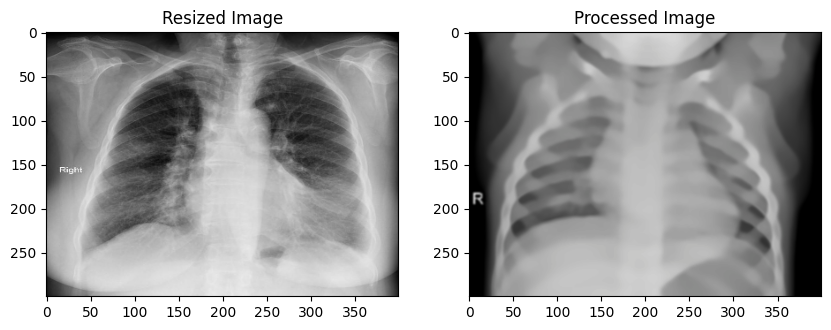

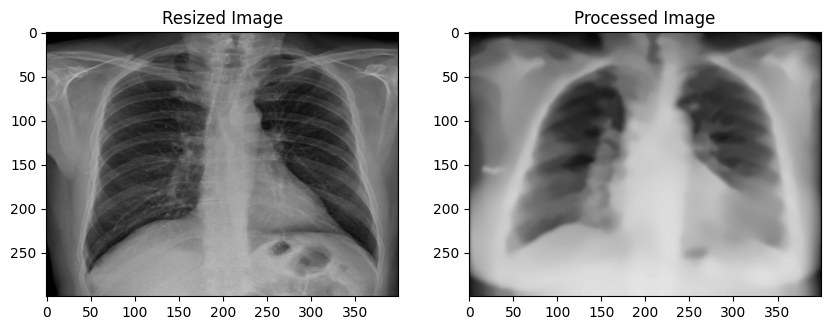

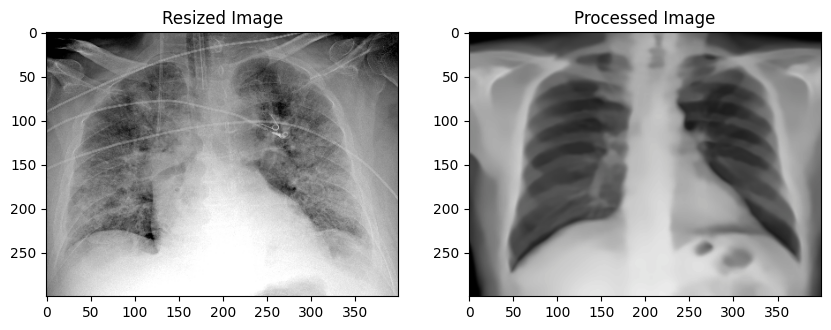

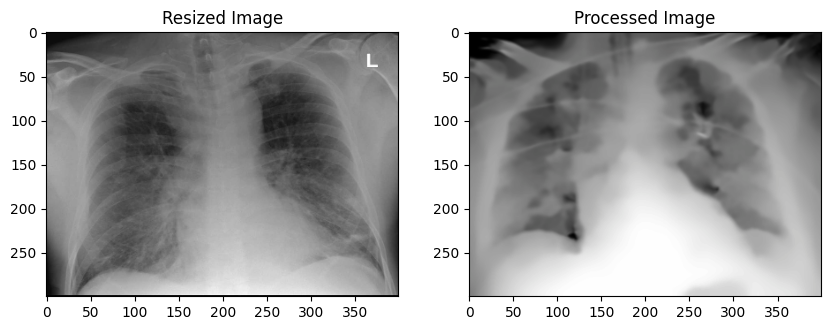

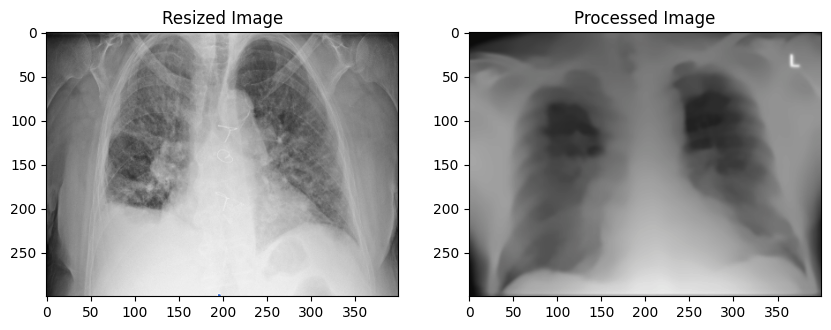

Все изображения в папке /content/Dataset/Val/Covid обработаны.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Задайте путь к вашему каталогу с изображениями
input_directory = r'/content/Dataset/Val/Covid'
output_directory = r'/content/Dataset/Val/Processed_Covid'

# Убедитесь, что каталог для сохранения обработанных изображений существует
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Получите список файлов в каталоге
image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpeg') or f.endswith('.jpg') or f.endswith('.png')]

# Проходите по каждому файлу изображения
for index, image_file in enumerate(image_files):
    # Загрузите изображение
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is not None:
        # Resize the image
        new_width = 400
        new_height = 300
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # 1.1 Размытие по Гауссу для шумоподавления
        blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

        # 1.2 Шумоподавление с помощью фильтра Non-Local Means
        denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

        # 1.3 Удаление артефактов: Обнаружение и удаление контуров
        contours, _ = cv2.findContours(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:  # Удалить маленькие контуры (можно настроить)
                cv2.drawContours(denoised_image, [contour], 0, (255, 255, 255), -1)

        # Min-Max Scaling для нормализации изображения
        min_val, max_val = np.min(resized_image), np.max(resized_image)
        normalized_image = (resized_image - min_val) / (max_val - min_val)

        # Преобразуйте нормализованное изображение в тип данных CV_8UC3
        normalized_image = (normalized_image * 255).astype(np.uint8)

        # Создайте новое имя файла для обработанного изображения
        processed_image_filename = 'processed_' + image_file

        # Сохраните обработанное изображение в новом каталоге
        processed_image_path = os.path.join(output_directory, processed_image_filename)
        cv2.imwrite(processed_image_path, denoised_image)

        # Отобразите исходное и обработанное изображение только для первых 5 изображений
        if index < 5:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title('Resized Image')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title('Processed Image')

            plt.show()

# Выведите сообщение после обработки всех изображений
print(f"Все изображения в папке {input_directory} обработаны.")


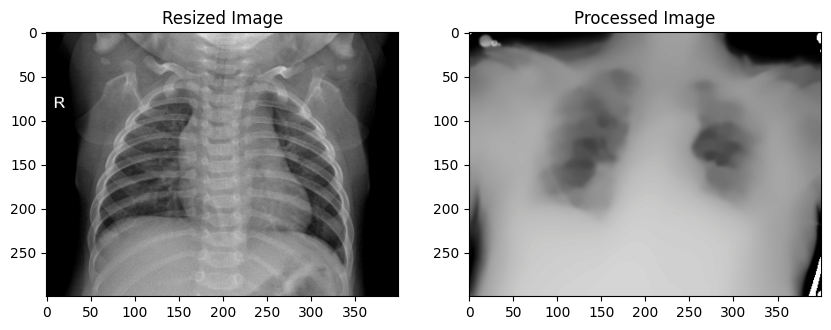

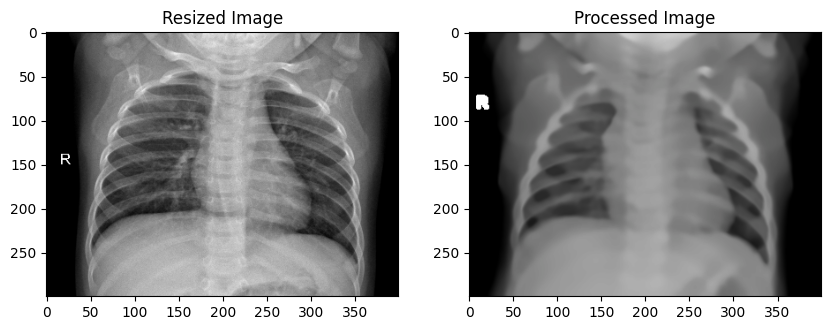

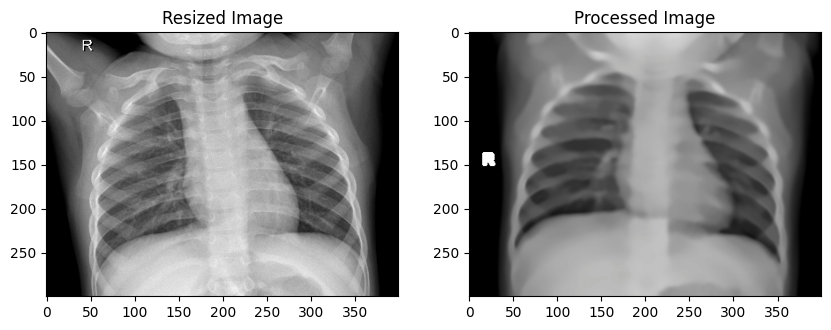

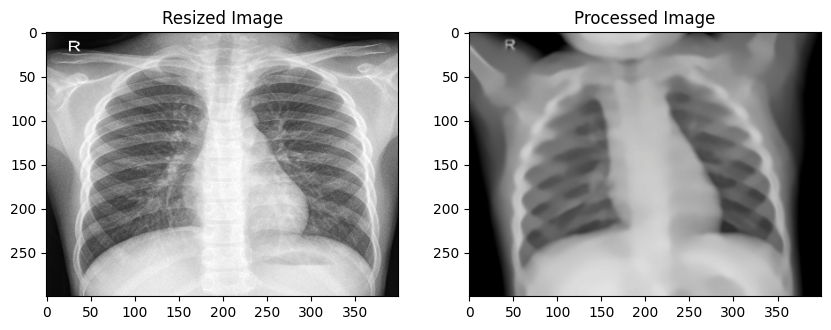

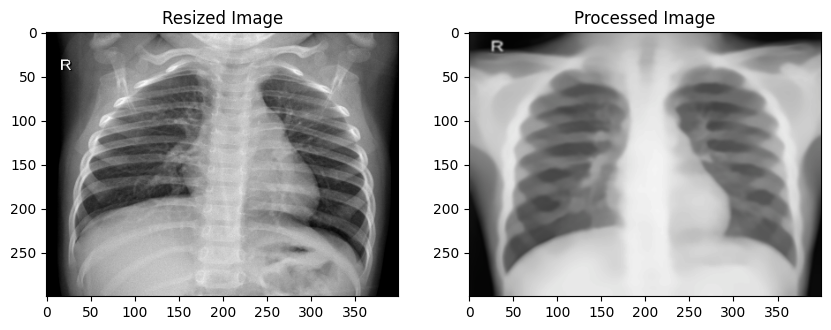

Все изображения в папке /content/Dataset/Val/Normal обработаны.


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Задайте путь к вашему каталогу с изображениями
input_directory = r'/content/Dataset/Val/Normal'
output_directory = r'/content/Dataset/Val/Processed_Normal'

# Убедитесь, что каталог для сохранения обработанных изображений существует
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Получите список файлов в каталоге
image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpeg') or f.endswith('.jpg') or f.endswith('.png')]

# Проходите по каждому файлу изображения
for index, image_file in enumerate(image_files):
    # Загрузите изображение
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is not None:
        # Resize the image
        new_width = 400
        new_height = 300
        resized_image = cv2.resize(original_image, (new_width, new_height))

        # 1.1 Размытие по Гауссу для шумоподавления
        blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

        # 1.2 Шумоподавление с помощью фильтра Non-Local Means
        denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

        # 1.3 Удаление артефактов: Обнаружение и удаление контуров
        contours, _ = cv2.findContours(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 500:  # Удалить маленькие контуры (можно настроить)
                cv2.drawContours(denoised_image, [contour], 0, (255, 255, 255), -1)

        # Min-Max Scaling для нормализации изображения
        min_val, max_val = np.min(resized_image), np.max(resized_image)
        normalized_image = (resized_image - min_val) / (max_val - min_val)

        # Преобразуйте нормализованное изображение в тип данных CV_8UC3
        normalized_image = (normalized_image * 255).astype(np.uint8)

        # Создайте новое имя файла для обработанного изображения
        processed_image_filename = 'processed_' + image_file

        # Сохраните обработанное изображение в новом каталоге
        processed_image_path = os.path.join(output_directory, processed_image_filename)
        cv2.imwrite(processed_image_path, denoised_image)

        # Отобразите исходное и обработанное изображение только для первых 5 изображений
        if index < 5:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title('Resized Image')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title('Processed Image')

            plt.show()

# Выведите сообщение после обработки всех изображений
print(f"Все изображения в папке {input_directory} обработаны.")


Train and Testing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
import pandas as pd
import os
import shutil

print(os.listdir('/content/Dataset'))

['Processed_Prediction', 'Train', 'Val', 'Prediction', '.ipynb_checkpoints']


In [ ]:
train_path = "/content/Dataset/Train/Processed_train"
val_path = "/content/Dataset/Val/Processed_Val"

In [ ]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation ="relu" , input_shape=(240,240,3)))

model.add(Conv2D(64 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , (3,3) , activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(.5))

model.add(Dense(1 , activation="sigmoid"))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy , optimizer="adam" , metrics=["accuracy" ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 236, 236, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 118, 118, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 118, 118, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 116, 116, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 58, 58, 128)       0         
 g2D)                                                 

In [ ]:
train_datagen = image.ImageDataGenerator(
rescale = 1./255. ,
shear_range = 0.2 ,
zoom_range =0.2 ,
 horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Train/Processed_train',
    target_size = (240,240),
    batch_size =32 ,
    class_mode ="binary"
)

Found 260 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Processed_Covid': 0, 'Processed_Normal': 1}

In [ ]:
val_generator = test_dataset.flow_from_directory(
    "/content/Dataset/Val/Processed_Val",
    target_size = (240,240),
    batch_size =32 ,
    class_mode ="binary"
)

Found 55 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
train_generator ,
steps_per_epoch = 8 ,
epochs = 10 ,
validation_data = val_generator,
validation_steps = 2
)

<ipython-input-45-2201e1f88394>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 169s 21s/step - loss: 1.5561 - accuracy: 0.5570 - val_loss: 0.6868 - val_accuracy: 0.5455
Epoch 2/10
8/8 [==============================] - 150s 21s/step - loss: 0.6642 - accuracy: 0.6096 - val_loss: 0.6373 - val_accuracy: 0.8364
Epoch 3/10
8/8 [==============================] - 149s 18s/step - loss: 0.5134 - accuracy: 0.7456 - val_loss: 0.3337 - val_accuracy: 0.9091
Epoch 4/10
8/8 [==============================] - 148s 18s/step - loss: 0.3957 - accuracy: 0.8202 - val_loss: 0.2826 - val_accuracy: 0.8909
Epoch 5/10
8/8 [==============================] - 139s 17s/step - loss: 0.2922 - accuracy: 0.8860 - val_loss: 0.2358 - val_accuracy: 0.9091
Epoch 6/10
8/8 [==============================] - 153s 19s/step - loss: 0.3008 - accuracy: 0.8860 - val_loss: 0.1908 - val_accuracy: 0.9455
Epoch 7/10
8/8 [==============================] - 155s 19s/step - loss: 0.2300 - accuracy: 0.9474 - val_loss: 0.1706 - val_accuracy: 0.9091
Epoch 8/10
8/8 [====

1/1 [==============================] - 0s 130ms/step


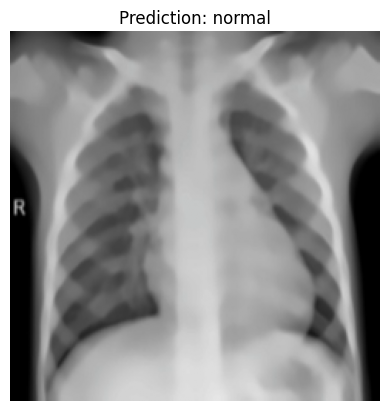

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, image_path, class_indices):

    img = cv2.imread(image_path)
    img = cv2.resize(img, (240, 240))
    img = img / 255.0
    img_array = np.expand_dims(img, axis=0)


    prediction = model.predict(img_array)
    predicted_class = 'normal' if prediction[0] > 0.5 else 'ill'



    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')
    plt.show()


specific_image_path = '/content/Dataset/Processed_Prediction/processed_ryct.2020200028.fig1a.jpeg'


predict_image(model, specific_image_path, train_generator.class_indices)
